In [15]:
# Import libraries and configure style of graph
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [16]:
# Create the training set
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# m = x_train.shape[0]

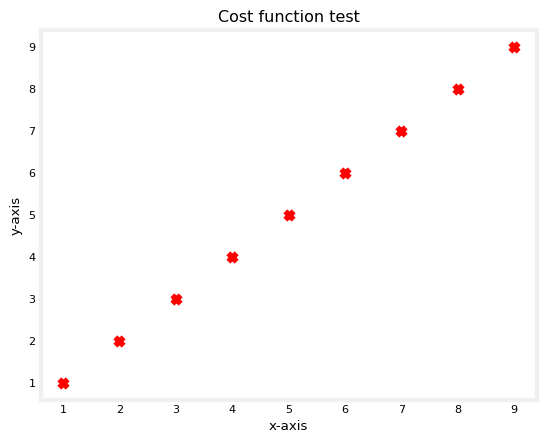

In [17]:
# Show graph with the training set
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Cost function test")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [18]:
# Set w, b, and the prediction function
w0 = 10
w1 = 3
w2 = -1
w3 = 1
b = 0

def compute_model_output(features, w, b):
    m = features.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * features[i] + b

    return f_wb

In [19]:
# Calculate the results of the predictions function with w = 10, b = 0
prediction_0 = compute_model_output(x_train, w0, b)
prediction_1 = compute_model_output(x_train, w1, b)
prediction_2 = compute_model_output(x_train, w2, b)
prediction_3 = compute_model_output(x_train, w3, b)


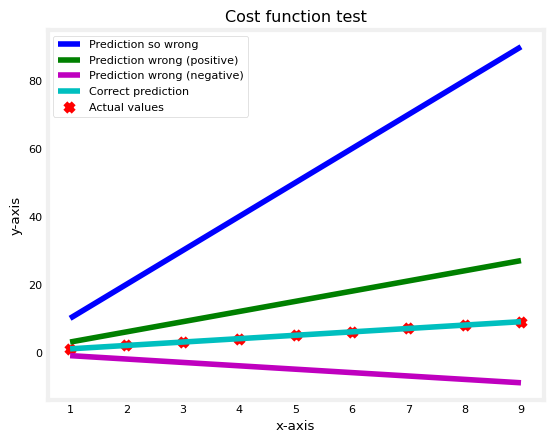

In [20]:
# Show graph with predictions and training set
plt.plot(x_train, prediction_0, c='b', label="Prediction so wrong")
plt.plot(x_train, prediction_1, c='g', label="Prediction wrong (positive)")
plt.plot(x_train, prediction_2, c='m', label="Prediction wrong (negative)")
plt.plot(x_train, prediction_3, c='c', label="Correct prediction")
plt.scatter(x_train, y_train, marker='x', c='r', label="Actual values")
plt.title("Cost function test")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

In [21]:
# Define the cost function
def square_error_const_fn(prediction, actual_values):
    m = prediction.shape[0]
    addition = 0
    for i in range(m):
        error = prediction[i] - actual_values[i]
        error = error * error
        addition += error
    addition = addition / (2 *m)
    return addition

In [22]:
# What happens with the result of the cost function if the prediction is
# 1. So wrong
# 2. Wrong but the prediction line is above the correct prediction
# 3. Wrong but the prediction line is under the correct prediction
# 4. The prediction is exactly correct
print(f'So wrong prediction:         {square_error_const_fn(prediction_0, y_train)}')
print(f'Wrong prediction (positive): {square_error_const_fn(prediction_1, y_train)}')
print(f'Wrong prediction (negative): {square_error_const_fn(prediction_2, y_train)}')
print(f'Correct prediction:          {square_error_const_fn(prediction_3, y_train)}')

So wrong prediction:         1282.5
Wrong prediction (positive): 63.333333333333336
Wrong prediction (negative): 63.333333333333336
Correct prediction:          0.0


In [23]:
# Define the cost function without square
def square_error_const_fn2(prediction, actual_values):
    m = prediction.shape[0]
    addition = 0
    for i in range(m):
        error = prediction[i] - actual_values[i]
        #error = error * error WITHOUT THIS
        addition += error
    addition = addition / (2 *m)
    return addition
print(f'So wrong prediction:         {square_error_const_fn2(prediction_0, y_train)}')
print(f'Wrong prediction (positive): {square_error_const_fn2(prediction_1, y_train)}')
print(f'Wrong prediction (negative): {square_error_const_fn2(prediction_2, y_train)}')
print(f'Correct prediction:          {square_error_const_fn2(prediction_3, y_train)}')

So wrong prediction:         22.5
Wrong prediction (positive): 5.0
Wrong prediction (negative): -5.0
Correct prediction:          0.0


In [24]:
# Define the cost function without 2 next to m
def square_error_const_fn3(prediction, actual_values):
    m = prediction.shape[0]
    addition = 0
    for i in range(m):
        error = prediction[i] - actual_values[i]
        error = error * error
        addition += error
    addition = addition / m # JUST m, NOT 2 * m
    return addition
print(f'So wrong prediction:         {square_error_const_fn3(prediction_0, y_train)}')
print(f'Wrong prediction (positive): {square_error_const_fn3(prediction_1, y_train)}')
print(f'Wrong prediction (negative): {square_error_const_fn3(prediction_2, y_train)}')
print(f'Correct prediction:          {square_error_const_fn3(prediction_3, y_train)}')

So wrong prediction:         2565.0
Wrong prediction (positive): 126.66666666666667
Wrong prediction (negative): 126.66666666666667
Correct prediction:          0.0


In [27]:
# Let's graph the first square error cost function
def get_multiples_j(w_inputs, x_train, actual_values):
    length = w_inputs.shape[0]
    cost_errors = np.zeros(length)

    for i in range(length):
        prediction = compute_model_output(x_train, w_inputs[i], 0) 
        cost_errors[i] = square_error_const_fn(prediction, actual_values)

    return cost_errors

w_inputs = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
j_outputs = get_multiples_j(w_inputs, x_train, y_train)

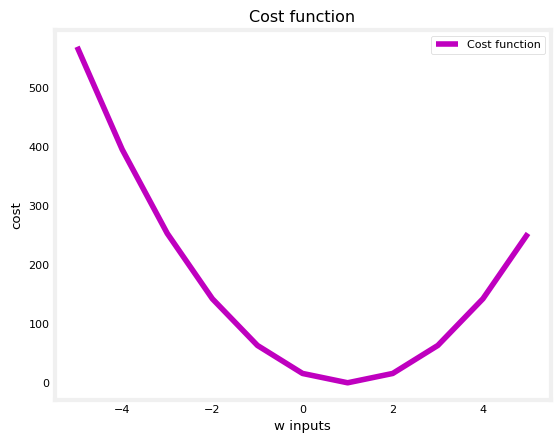

In [29]:
plt.plot(w_inputs, j_outputs, c='m', label="Cost function")
# plt.scatter(x_train, y_train, marker='x', c='r', label="Actual values")
plt.title("Cost function")
plt.xlabel("w inputs")
plt.ylabel("cost")
plt.legend()
plt.show()